In [1]:
import pandas as pd
import missingno as msno

In [2]:
data = pd.read_csv('train_logs.csv')

In [4]:
data.head(5)

id  event_id  down_time  up_time  action_time       activity  \
0  001519c8         1       4526     4557           31  Nonproduction   
1  001519c8         2       4558     4962          404  Nonproduction   
2  001519c8         3     106571   106571            0  Nonproduction   
3  001519c8         4     106686   106777           91          Input   
4  001519c8         5     107196   107323          127          Input   

  down_event   up_event text_change  cursor_position  word_count  
0  Leftclick  Leftclick    NoChange                0           0  
1  Leftclick  Leftclick    NoChange                0           0  
2      Shift      Shift    NoChange                0           0  
3          q          q           q                1           1  
4          q          q           q                2           1

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


<AxesSubplot:>

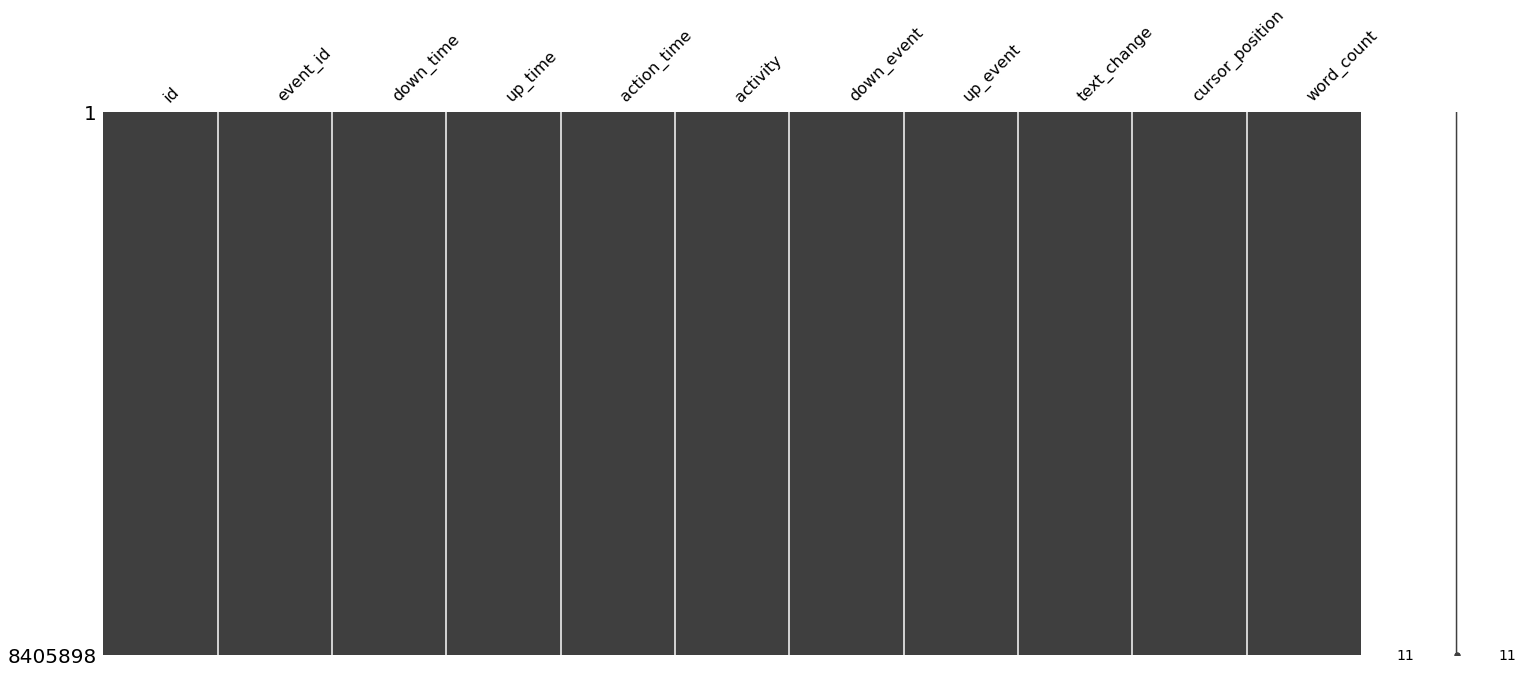

In [14]:
msno.matrix(data)

There are no missing data

In [8]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

event_id      down_time        up_time    action_time  \
count  8405898.00000  8405898.00000  8405898.00000  8405898.00000   
mean      2067.64933   793560.28958   793658.37456       98.08498   
std       1588.28380   514945.05723   514942.76649      253.39846   
min          1.00000      106.00000      252.00000        0.00000   
25%        852.00000   373184.25000   373282.00000       66.00000   
50%       1726.00000   720886.00000   720980.00000       93.00000   
75%       2926.00000  1163042.00000  1163141.00000      122.00000   
max      12876.00000  8313630.00000  8313707.00000   447470.00000   

      cursor_position     word_count  
count   8405898.00000  8405898.00000  
mean       1222.96445      231.46875  
std         948.52423      175.90884  
min           0.00000        0.00000  
25%         499.00000       96.00000  
50%        1043.00000      200.00000  
75%        1706.00000      327.00000  
max        7802.00000     1326.00000

There are no strange numbers or number that don't make sense (eg: negative times)

Each instance of id is its own text, in order to analyze general numbes for each text it will be necessary to aggregate them

In [17]:
n_texts= data['id'].nunique()
n_texts

2471

In [23]:
features=['sum']
data.groupby('id').aggregate(['sum','min'])

event_id       down_time            up_time        action_time      \
               sum min         sum    min         sum    min         sum min   
id                                                                             
001519c8   3270403   1  2168798234   4526  2169095477   4557      297243   0   
0022f953   3012285   1  1273271023  30623  1273546414  30853      275391   0   
0042269b   8555316   1  3426641982   4441  3427063183   4540      421201   0   
0059420b   1211346   1  1222211589  41395  1222401185  41513      189596   0   
0075873a   3204246   1  1805499474  78470  1805813176  78693      313702   0   
...            ...  ..         ...    ...         ...    ...         ...  ..   
ffb8c745  11231430   1  3488386746  22467  3488886416  22551      499670   0   
ffbef7e5   3391710   1  2192480040  21732  2192694261  22027      214221   0   
ffccd6fd   4692516   1  3764472937  23482  3764704517  23570      231580   0   
ffec5b38   5256903   1  1869073112  19885  1869362551  20088      289439   0   
fff05981   6550390   1  3897099261  39727  3897400496  39880      301235   0   

                                                   activity         \
                                                        sum    min   
id                                                                   
001519c8  NonproductionNonproductionNonproductionInputIn...  Input   
0022f953  NonproductionNonproductionInputInputInputInput...  Input   
0042269b  NonproductionNonproductionInputInputInputInput...  Input   
0059420b  NonproductionNonproductionNonproductionNonprod...  Input   
0075873a  NonproductionNonproductionInputInputInputInput...  Input   
...                                                     ...    ...   
ffb8c745  NonproductionNonproductionNonproductionInputIn...  Input   
ffbef7e5  NonproductionNonproductionNonproductionInputIn...  Input   
ffccd6fd  NonproductionNonproductionInputInputInputInput...  Input   
ffec5b38  NonproductionNonproductionInputInputInputInput...  Input   
fff05981  NonproductionNonproductionInputInputInputInput...  Input   

                                                 down_event      \
                                                        sum min   
id                                                                
001519c8  LeftclickLeftclickShiftqqqqqqSpaceqqqSpaceqqqq...   '   
0022f953  LeftclickShiftqqqqSpaceqqSpaceShiftqqqqqqqqqqq...   "   
0042269b  LeftclickShiftqqqqqqqSpaceqqqSpaceqqqqSpaceqqq...   "   
0059420b  LeftclickLeftclickShiftShiftShiftShiftShiftShi...   '   
0075873a  LeftclickShiftqqqqqqqqqqqSpaceqqSpaceqLeftclic...   '   
...                                                     ...  ..   
ffb8c745  LeftclickTabLeftclickSpaceSpaceSpaceSpaceSpace...   "   
ffbef7e5  LeftclickLeftclickShiftqqqqSpaceqqqqqqSpaceqqq...   '   
ffccd6fd  LeftclickLeftclickqqqqqqSpaceqqqqSpaceqSpaceqq...   ,   
ffec5b38  LeftclickShiftqqqqqqqqBackspaceqqqSpaceqqqqqqq...   "   
fff05981  LeftclickLeftclickqqSpaceqqqqSpaceqqqqqqqqSpac...   %   

                                                   up_event      \
                                                        sum min   
id                                                                
001519c8  LeftclickLeftclickShiftqqqqqqSpaceqqqSpaceqqqq...   '   
0022f953  LeftclickShiftqqqqSpaceqqSpaceShiftqqqqqqqqqqq...   "   
0042269b  LeftclickShiftqqqqqqqSpaceqqqSpaceqqqqSpaceqqq...   "   
0059420b  LeftclickLeftclickShiftShiftShiftShiftShiftShi...   '   
0075873a  LeftclickShiftqqqqqqqqqqqSpaceqqSpaceqLeftclic...   '   
...                                                     ...  ..   
ffb8c745  LeftclickTabLeftclickSpaceSpaceSpaceSpaceSpace...   "   
ffbef7e5  LeftclickLeftclickShiftqqqqSpaceqqqqqqSpaceqqq...   '   
ffccd6fd  LeftclickLeftclickqqqqqqSpaceqqqqSpaceqSpaceqq...   ,   
ffec5b38  LeftclickShiftqqqqqqqqBackspaceqqqSpaceqqqqqqq...   "   
fff05981  LeftclickLeftclickqqSpaceqqqqSpaceqqqqqqqqSpac...   %   

                              